In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from minepy import MINE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import fetch_california_housing
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.inspection import permutation_importance
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, LassoLarsIC, LassoLarsCV
import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../../data/tidy/data-aggregation.csv', index_col=[0])

In [3]:
df.head()

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,fueloil_gal,vmt,hh_2014,cf_transport_phh,cf_housing_phh,cf_food_phh,cf_goods_phh,cf_services_phh,cf_phh,cf
MSA,,,,,,,,,,,,,,,,,,,,,
"Abilene, TX",60343,44249,0.806459,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081,6.4,...,1.336685,76234.634771,65492.0,15.927517,12.674110,7.667713,4.616458,5.004892,49.144098,3.218545e+06
"Akron, OH",281752,50776,0.862746,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080,9.7,...,79.046948,47008.858596,160668.0,15.993913,11.746599,7.517472,5.391050,6.071775,50.968122,8.188946e+06
"Albany, GA",58250,36805,0.804208,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567,15.0,...,9.162196,72787.504018,57134.0,14.360085,13.990202,7.972296,4.684970,5.050888,46.428323,2.652636e+06
"Albany-Schenectady-Troy, NY",347401,61841,0.804724,0.076936,0.032160,0.009713,0.002339,0.036837,0.037290,7.4,...,1181.335835,103020.435963,392206.0,14.195390,10.778376,7.221763,5.349727,6.058857,47.021127,1.844197e+07
"Albuquerque, NM",344168,48875,0.799726,0.095175,0.018131,0.013973,0.009816,0.018735,0.044445,9.1,...,4.024810,101942.760602,305713.0,15.594705,13.531895,7.775563,5.051710,5.576700,49.593381,1.516134e+07


In [4]:
len(df.columns)

48

In [5]:
cfdf = df.iloc[:,39:44]
cfdf

,vmt,hh_2014,cf_transport_phh,cf_housing_phh,cf_food_phh
MSA,,,,,
"Abilene, TX",76234.634771,65492.0,15.927517,12.674110,7.667713
"Akron, OH",47008.858596,160668.0,15.993913,11.746599,7.517472
"Albany, GA",72787.504018,57134.0,14.360085,13.990202,7.972296
"Albany-Schenectady-Troy, NY",103020.435963,392206.0,14.195390,10.778376,7.221763
"Albuquerque, NM",101942.760602,305713.0,15.594705,13.531895,7.775563
...,...,...,...,...,...
"Yakima, WA",25270.202024,79421.0,16.793236,10.812623,9.075718
"York-Hanover, PA",23741.762033,155267.0,16.397364,14.406175,7.592190
"Youngstown-Warren-Boardman, OH-PA",63030.011887,254138.0,14.373674,17.003000,7.355032


In [6]:
cf = cfdf.multiply(df['hh_2014'], axis="index")/1e6

In [7]:
cfct = cf.loc[["New Haven-Milford, CT", "Norwich-New London, CT", "Worcester, MA-CT"]]
cfct.columns = ['Transport','Housing','Food','Goods','Services']

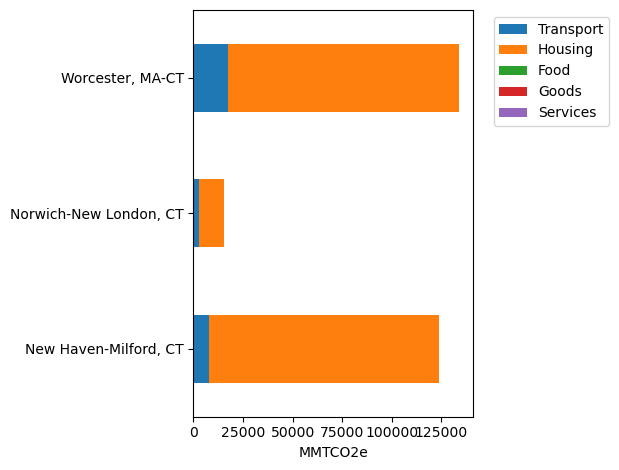

<Figure size 5000x1000 with 0 Axes>

In [10]:
fig, ax = plt.subplots()
plt.figure(figsize=(50,10))
cfct.plot(kind='barh', stacked=True, ax=ax)
#plt.grid('True',zorder=-50)
ax.set_xlabel('MMTCO2e')
ax.set_ylabel('')
ax.legend(bbox_to_anchor=(1.05,1))
fig.tight_layout()
fig.savefig('../../figures/cf_ct_msa.png',dpi=300)